In [1]:
import numpy as np

num_puntos = 2000
conjunto_puntos = []
for i in range(num_puntos):
    if np.random.random() > 0.5:
        conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])


Display the points that have been generated randomly.

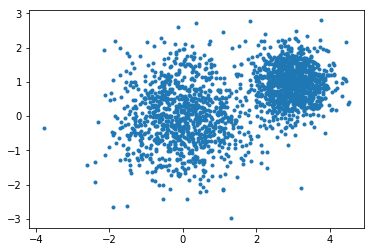

In [4]:
import matplotlib.pyplot as plt

plt.plot([x[0] for x in conjunto_puntos], [x[1] for x in conjunto_puntos], '.')
plt.show()

In [8]:
import tensorflow as tf

vectors = tf.constant(conjunto_puntos)
k = 3
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])), 1) for c in range(k)], 0)

update_centroides = tf.assign(centroides, means)

with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for step in range(500):
        _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

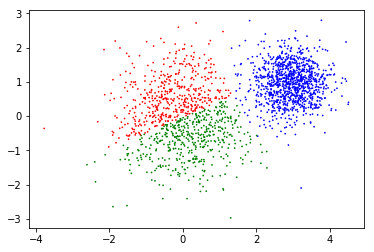

In [9]:
hue = ['b', 'r', 'g', 'y']

plt.scatter([x[0] for x in conjunto_puntos], [x[1] for x in conjunto_puntos], c=[hue[assignment_values[i]] for i in range(len(assignment_values))], s=0.5)
plt.show()